In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.decomposition import PCA

from sklearn.ensemble import ExtraTreesClassifier

In [6]:
df = pd.read_csv("/Users/fatemeh/Thises/exprimentalResult/ActivityClassification/PMData_Analysis/Classification/1/PMData1.csv")
df.head()
#print(df.columns)

,item_id,date,steps,sedentary,LPA,MPA,VPA,sleep_duration,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,active
0,p01,2019-11-01,17873.0,636,245,58,72,429,38.0,27.0,53.0,0.053635,4
1,p01,2019-11-02,13118.0,709,202,43,56,430,37.0,36.0,53.0,0.078978,4
2,p01,2019-11-03,14312.0,648,262,63,45,422,38.0,38.0,52.0,0.093491,4
3,p01,2019-11-04,10970.0,760,230,23,28,399,38.0,37.0,53.0,0.064851,3
4,p01,2019-11-05,16186.0,737,263,22,56,362,36.0,26.0,54.0,0.093185,4


In [11]:
dstep = df[['item_id', 'date', 'steps']]
dstep.to_csv('PMData2.csv', index=False)

In [12]:
columns = ['steps', 'sedentary', 'LPA', 'MPA', 'VPA',
       'sleep_duration', 'duration_score', 'deep_sleep_in_minutes',
       'resting_heart_rate', 'restlessness']
data = df[columns]
data.head()


,steps,sedentary,LPA,MPA,VPA,sleep_duration,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,17873.0,636,245,58,72,429,38.0,27.0,53.0,0.053635
1,13118.0,709,202,43,56,430,37.0,36.0,53.0,0.078978
2,14312.0,648,262,63,45,422,38.0,38.0,52.0,0.093491
3,10970.0,760,230,23,28,399,38.0,37.0,53.0,0.064851
4,16186.0,737,263,22,56,362,36.0,26.0,54.0,0.093185


In [13]:
cor  = data.corr()
cor.style.background_gradient(cmap='GnBu')

,steps,sedentary,LPA,MPA,VPA,sleep_duration,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
steps,1.000000,-0.583654,0.607104,0.572453,0.772726,0.255018,0.009588,-0.197418,-0.324276,-0.077537
sedentary,-0.583654,1.000000,-0.717942,-0.453531,-0.463407,-0.884266,-0.107932,0.075138,0.093850,-0.013390
LPA,0.607104,-0.717942,1.000000,0.469270,0.229081,0.364130,-0.026460,-0.185220,-0.133432,-0.184293
MPA,0.572453,-0.453531,0.469270,1.000000,0.455494,0.168720,-0.004189,-0.158449,-0.140081,-0.129810
VPA,0.772726,-0.463407,0.229081,0.455494,1.000000,0.257348,-0.016822,-0.235494,-0.398546,0.069895
sleep_duration,0.255018,-0.884266,0.364130,0.168720,0.257348,1.000000,0.176911,0.070261,0.049184,0.124124
duration_score,0.009588,-0.107932,-0.026460,-0.004189,-0.016822,0.176911,1.000000,0.430496,0.100408,-0.223720
deep_sleep_in_minutes,-0.197418,0.075138,-0.185220,-0.158449,-0.235494,0.070261,0.430496,1.000000,0.300120,-0.060354
resting_heart_rate,-0.324276,0.093850,-0.133432,-0.140081,-0.398546,0.049184,0.100408,0.300120,1.000000,0.084418
restlessness,-0.077537,-0.013390,-0.184293,-0.129810,0.069895,0.124124,-0.223720,-0.060354,0.084418,1.000000


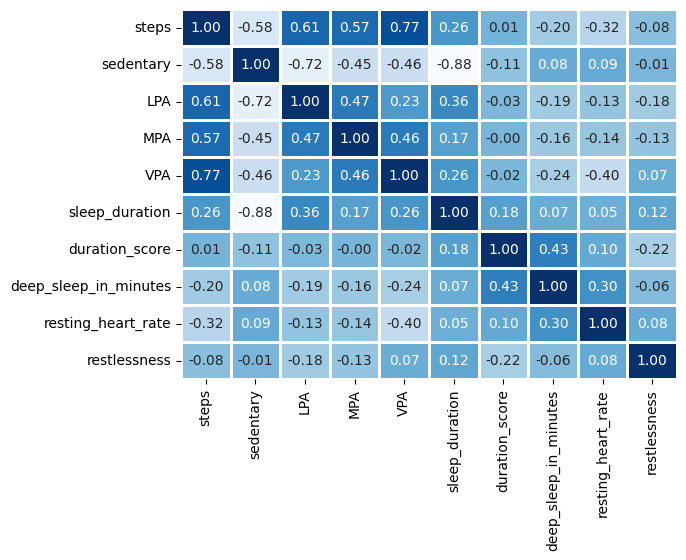

In [14]:
fig, ax = plt.subplots()
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('Blues'), cbar=False, linewidths=1, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('Corr_result_in_pmdata1.png', bbox_inches='tight', pad_inches=0.0, dpi=300)

In [ ]:
mostcorrelated = ['sedentary', 'LPA', 'MPA', 'VPA', 'steps']
data_mostcorrelated = data[mostcorrelated]


corr = data_mostcorrelated.corr()
corr.style.background_gradient(cmap='coolwarm')

,sedentary,LPA,MPA,VPA,steps
sedentary,1.000000,-0.717942,-0.453531,-0.463407,-0.583654
LPA,-0.717942,1.000000,0.469270,0.229081,0.607104
MPA,-0.453531,0.469270,1.000000,0.455494,0.572453
VPA,-0.463407,0.229081,0.455494,1.000000,0.772726
steps,-0.583654,0.607104,0.572453,0.772726,1.000000


/var/folders/yr/hy7b_nl94zg6x7p5xd0ypr180000gn/T/ipykernel_54497/2459329565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='active', data = df, palette = "Set2", saturation = 0.1)


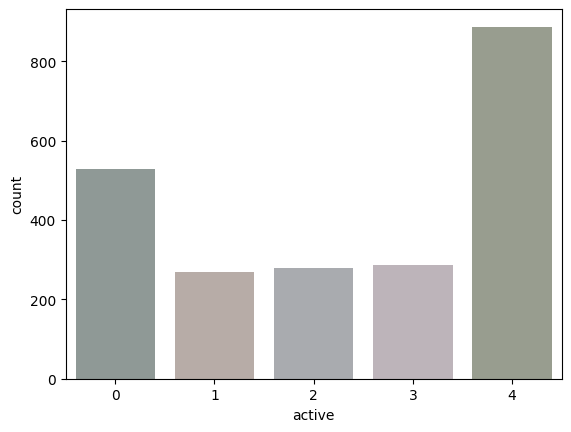

In [7]:
# count plot on single categorical variable
sns.countplot(x ='active', data = df, palette = "Set2", saturation = 0.1)

plt.savefig('Distribution_of_classes_PMData1.png', bbox_inches='tight', pad_inches=1.0, dpi=300)

In [8]:
df.isnull().values.any()

np.False_

In [9]:
df.shape

(2250, 13)

In [10]:
features_vector = ['item_id', 'date', 'steps', 'sedentary', 'LPA', 'MPA', 'VPA', 'active']
df[features_vector].to_csv('PMData_features_vector.csv', index=False)

In [17]:
X = df[['steps', 'sedentary', 'LPA', 'MPA', 'VPA']]
Y = df['active']

In [18]:
#Feature selection
#SelectKBest
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X,Y)

set_printoptions(precision=2)
print(fit.scores_)

mask = fit.get_support()
print("Mask:", mask)

selected_features = X.columns[mask]
print("Selected feature names:", selected_features)

featured_data = fit.transform(X)
print ("\nFeatured data:\n", featured_data[0:5])

[7845339.55   78943.6    61970.47   17951.64   56105.65]
Mask: [ True  True  True  True  True]
Selected feature names: Index(['steps', 'sedentary', 'LPA', 'MPA', 'VPA'], dtype='object')

Featured data:
 [[17873.   636.   245.    58.    72.]
 [13118.   709.   202.    43.    56.]
 [14312.   648.   262.    63.    45.]
 [10970.   760.   230.    23.    28.]
 [16186.   737.   263.    22.    56.]]


In [19]:
#PCA
pca = PCA(n_components=5)
fit = pca.fit(X)
print(fit.get_feature_names_out())
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
print(fit.components_)


['pca0' 'pca1' 'pca2' 'pca3' 'pca4']
Explained Variance: [9.99e-01 1.30e-03 1.27e-04 1.21e-05 7.46e-06]
[[ 1.00e+00 -2.53e-02  1.04e-02  1.98e-03  5.36e-03]
 [ 2.71e-02  9.72e-01 -2.34e-01 -1.47e-02  2.50e-03]
 [-2.67e-03  2.27e-01  9.39e-01  2.20e-02 -2.56e-01]
 [-6.50e-03  5.83e-02  2.37e-01  2.38e-01  9.40e-01]
 [ 2.00e-05 -4.65e-03 -8.29e-02  9.71e-01 -2.25e-01]]


In [20]:
# Feature Importance
# Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_names_in_)
print(model.feature_importances_)

['steps' 'sedentary' 'LPA' 'MPA' 'VPA']
[0.53 0.09 0.12 0.08 0.18]
